# Step01: Data Cleaning
In this notebook the Savant data will be imported and cleaned

## Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
pitches = pd.read_csv('../data/savant/madmax_2019_pitches.csv')
madmax = pitches.copy()

In [3]:
madmax.head();

## Columns to lowercase and replace spaces with '_'

In [4]:
new_cols = []

for c in madmax.columns:
    c = c.lower()
    c = c.replace(' ', '_')
    c = c.replace('(', '')
    c = c.replace(')', '')
    c = c.replace('_°', '')
    new_cols.append(c)
    
madmax.columns = new_cols

In [5]:
madmax.columns

Index(['pitch', 'mph', 'ev_mph', 'pitcher', 'batter', 'dist', 'spin_rate',
       'la', 'zone', 'date', 'count', 'inning', 'pitch_result', 'pa_result'],
      dtype='object')

## Columns look good, lets go through the data one column at a time
We will review the data in each column in order to assess its importance, the handling of null values, and any other issues we may come across

### pitch column
- Variable type: Dependant, Categorical
- Data type: string
- Unique values: 5

In [6]:
madmax.pitch.value_counts()

FF    1341
SL     573
CH     401
CU     241
FC     214
Name: pitch, dtype: int64

Based on the following link, Max throws five different types of pitches <br>
https://library.fangraphs.com/pitch-type-abbreviations-classifications/ <br><br>
__Max's Pitch Repertoire in 2019__
- FF: Four Seam Fastball
- SL: Slider
- CH: Changeup
- CU: Curveball
- FC: Fastball (Cutter)

This will ultimatly be one of two targets in this study.  Looks like Max's go to pitch is the four seam fastball with the changeup and curveball representing minority classes.

### mph column
- Variable type: TBD, Continuous
- Data type: Float
- Number of unique Values: n/a

In [7]:
len(madmax.mph.value_counts())

226

In [8]:
madmax.mph.min(), madmax.mph.max()

(74.5, 98.4)

In [9]:
r = madmax.mph.max() - madmax.mph.min()
r/5

4.780000000000001

#### These velocities relate directly to pitch types, let's take a look at these values together

In [10]:
pitches = madmax.pitch.unique()
pitches

array(['FF', 'CH', 'SL', 'CU', 'FC'], dtype=object)

In [11]:
results = {}
p_count = 1
for p in pitches:
    avg = madmax.loc[(madmax.pitch == p)].mph.mean()
    low = madmax.loc[(madmax.pitch == p)].mph.min()
    high = madmax.loc[(madmax.pitch == p)].mph.max()
    i = str('p{}'.format(p_count))
    results[i] = [p, avg, low, high]
    p_count += 1 

In [12]:
results = pd.DataFrame(results).T
results.columns = ['pitch_type', 'mean', 'min', 'max']
results

,pitch_type,mean,min,max
p1,FF,94.8526,87.3,98.4
p2,CH,84.2728,80.5,89.3
p3,SL,85.5663,82.5,88.4
p4,CU,78.5471,74.5,81.9
p5,FC,89.8257,87,93.9


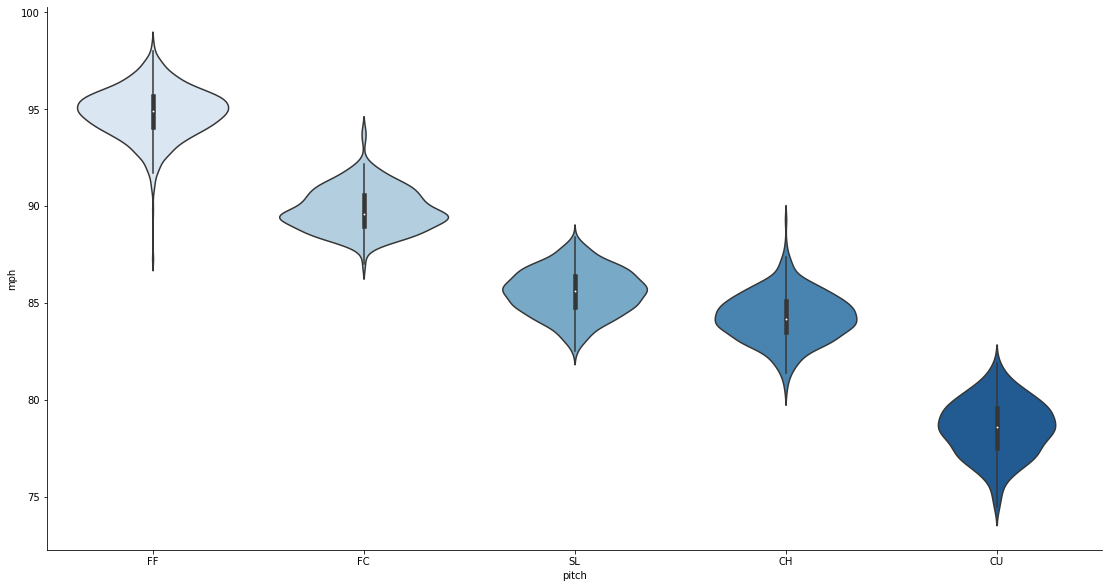

In [13]:
sns.catplot(x = 'pitch', 
            y = 'mph', 
            kind = 'violin', 
            data=madmax, 
            order = ['FF', 'FC', 'SL', 'CH', 'CU'], 
            palette='Blues',
            height=8.27, 
            aspect=15/8);

### Key takeaway: Consider combining the slider and curveball pitches to one category
- Good separation between four seem fastball, fastball cutter, and the change up
- The slider and curveball exhibit closer mph than other pitches

### ev_mph column
- This is the exit velocity if the pitch is hit, it is null otherwise
- Not interested in hits for this experiment so this column is dropped

In [14]:
madmax = madmax.drop(columns=['ev_mph'])

### pitcher column
- This is the man madmax and therefore irrelvant, dropping column

In [15]:
madmax = madmax.drop(columns=['pitcher'])

### batter column
- Irrelevant for this experiment's scope and therefore dropping column

In [16]:
madmax = madmax.drop(columns=['batter'])

### dist column
- Distance of the hit, not relevant and therefore dropped

In [17]:
madmax = madmax.drop(columns=['dist'])

### spin_rate column
- Variable type: Independant, Continuous
- Data type: Int
- Unique Values: n/a

In [18]:
madmax.spin_rate.describe();

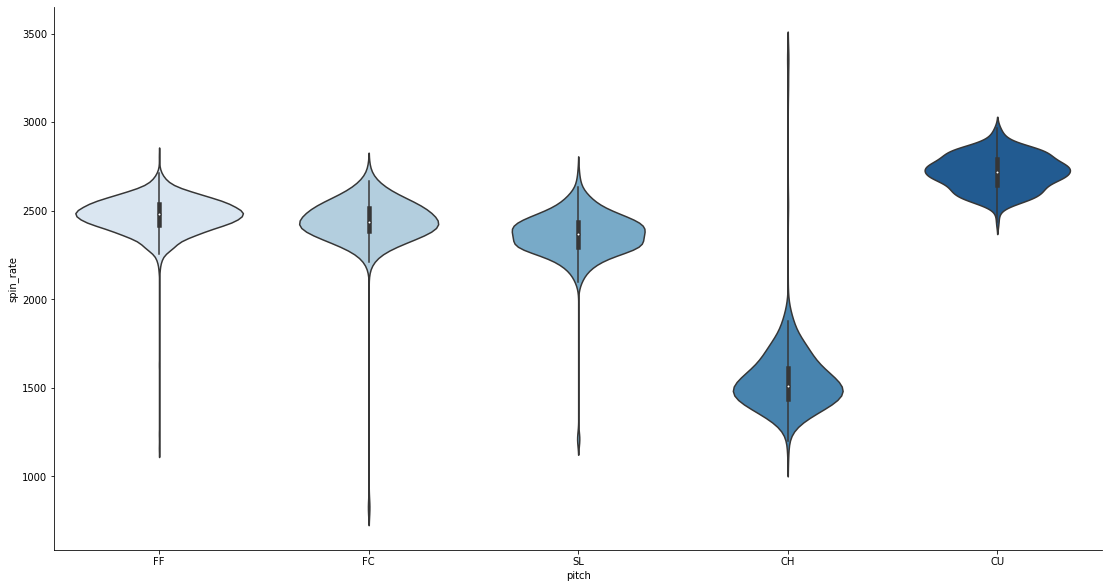

In [19]:
sns.catplot(x = 'pitch', 
            y = 'spin_rate', 
            kind = 'violin', 
            data=madmax, 
            order = ['FF', 'FC', 'SL', 'CH', 'CU'], 
            palette='Blues',
            height=8.27, 
            aspect=15/8);

Wow, Mad Max's spin rate is similar for his four-seam fastball, cutter, and slider.  All though his curveball is close, to these other three values, his changeup appears to spin much less than his other pitches.

### la column
- Represnts the launch angle of a hit, out of scope for this experiment and is dropped

In [20]:
madmax = madmax.drop(columns=['la'])

### zone column
- Variable type: Independant, Continuous
- Data type: Int
- Number unique Values: 13
    - This is an integral dependant variable in the experiment and indicates where the pitch is thrown in or out of the strike zone
    - These number 1 - 14 
    - For example, with a right-handed hitter zone 3 is high and inside whereas for a left-handed hitter zone 3 is high and outside
    
<br>
<img src='../images/statcast_zones.png' alt='Drawing' style='width: 450px;'/><br>

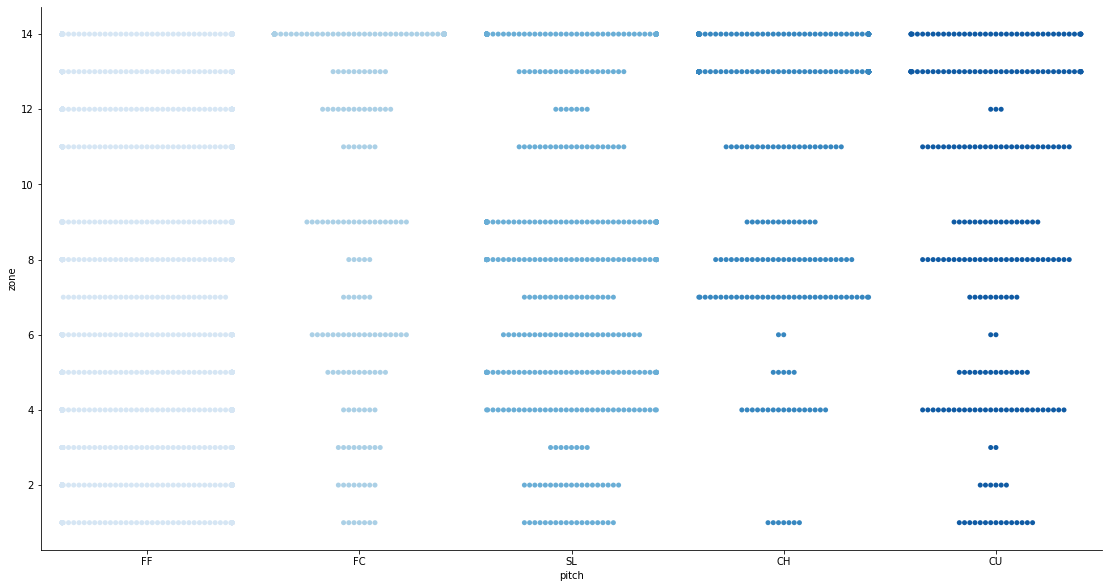

In [21]:
sns.catplot(x = 'pitch', 
            y = 'zone', 
            kind = 'swarm', 
            data=madmax, 
            order = ['FF', 'FC', 'SL', 'CH', 'CU'], 
            palette='Blues',
            height=8.27, 
            aspect=15/8);

 __Key Takeaway:__ Need to consider combining zone with handedness of the batter to discern "inside" or "outside" categories vs. numeric values

### date column
- Irrelvant to this experiment and will be dropped
- If broght back, will consider binning values by month

In [22]:
madmax = madmax.drop(columns=['date'])

### count column
- Variable type: Dependant, Categorical
- Data type: Object/string
- Number unique Values: 12

In [23]:
madmax['count'].value_counts()

0-0    692
0-1    432
1-2    308
1-1    261
0-2    254
2-2    235
1-0    201
3-2    157
2-1    119
2-0     55
3-1     40
3-0     16
Name: count, dtype: int64

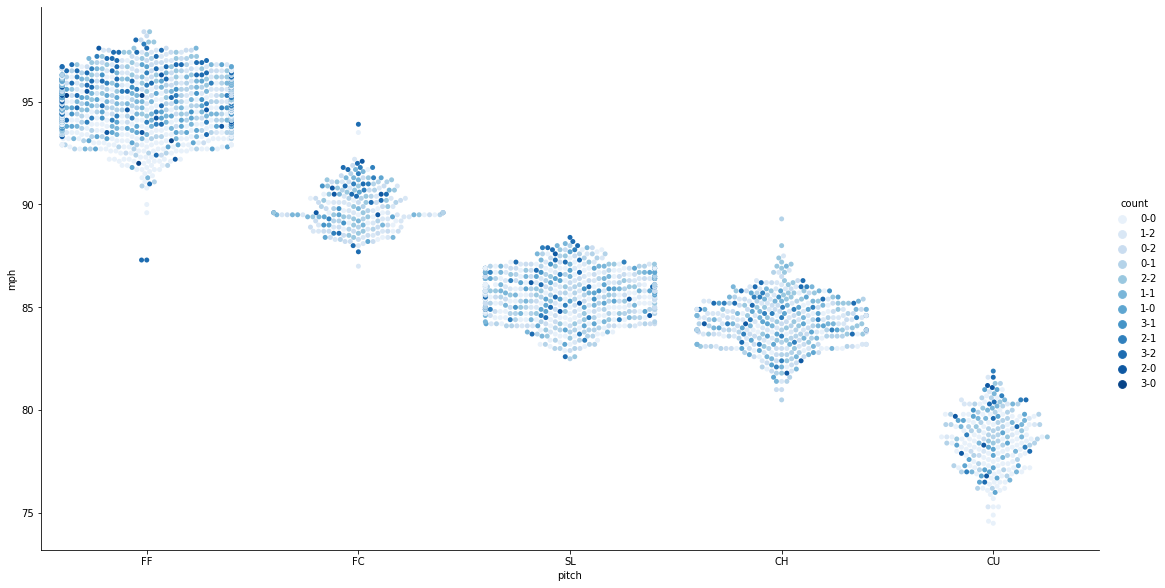

In [24]:
sns.catplot(x = 'pitch', 
            y = 'mph', 
            kind = 'swarm', 
            data = madmax, 
            order = ['FF', 'FC', 'SL', 'CH', 'CU'], 
            palette = 'Blues',
            hue = 'count',
            height = 8.27, 
            aspect = 15/8);

__Key Takeaway__: On superficial inspection, it looks like random spread of pitch selection and velocity by count values

### inning column

In [25]:
madmax.inning

0       Top 6
1       Top 6
2       Top 6
3       Top 6
4       Top 6
        ...  
2765    Top 1
2766    Top 1
2767    Top 1
2768    Top 1
2769    Top 1
Name: inning, Length: 2770, dtype: object

### pitch_result column

### pa_result column